# Основи нейромереж 2
Класифікація зображень за допомогою Convolution Layers

---
<a name="0" a/>

### Зміст:

* 1. [Імпорт данних](#1)
* 2. [Первинний аналіз](#2)
* 3. [Побудова нейронних мереж](#3)
* 4. [Навчання моделей і оцінка результатів](#4)

Інсталяція бібліотек

In [ ]:
!pip install tensorflow

Імпорт бібліотек

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix

---
<a name="1" a/>

### 1. Імпорт данних
[зміст](#0)

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


Візуалізація

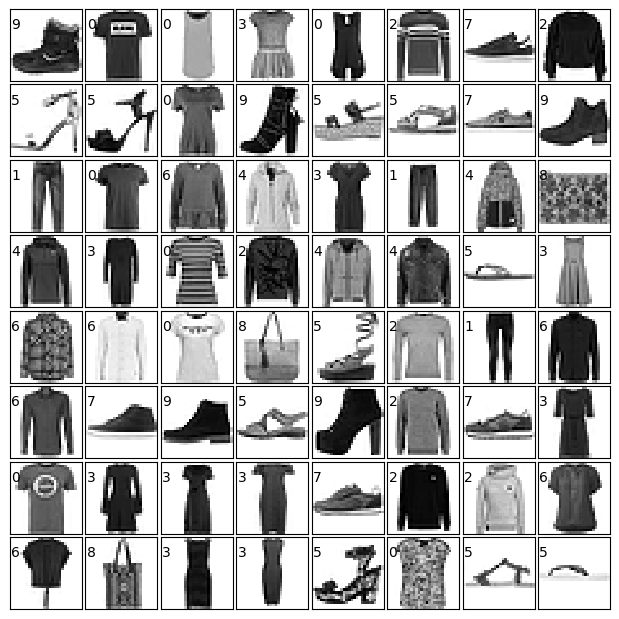

In [6]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

---
<a name="2" a/>

### 2. Первинний аналіз
[зміст](#0)

Змінення структури

In [7]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

---
<a name="3" a/>

### 3. Побудова нейронних мереж
[зміст](#0)

Гіперпараметри для моделі

In [9]:
training_epochs = 5 # Total number of training epochs
learning_rate = 0.01 # The learning rate

Загальна функції додавання блоків Covn шарів у модель

In [10]:
def add_conv_layers(model, layer_counts, filters, kernel_size, pool_size, input_shape=None):
    # first layer
    if input_shape is not None:
        model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    else:
        model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))

    for i in range(0, layer_counts-1):
        model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))

    model.add(MaxPooling2D(pool_size))

Загальна функція додавання Dense шарів у модель

In [11]:
def add_dense_layers(model, layer_counts, units_list, classes_count):
    model.add(Flatten())
    for i in range(0, layer_counts):
        model.add(Dense(units_list[i], activation='relu'))
    model.add(Dense(classes_count, activation='softmax'))

Функція побудови графіків accuracy/epochs, loss/epochs

In [12]:
def create_plot(results):
    # summarize history for accuracy
    plt.subplot(211)
    plt.plot(results.history['accuracy'])
    plt.plot(results.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])

    # summarize history for loss
    plt.subplot(212)
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.tight_layout()

    max_loss = np.max(results.history['loss'])
    min_loss = np.min(results.history['loss'])
    print("Maximum Loss : {:.4f}".format(max_loss))
    print("Minimum Loss : {:.4f}".format(min_loss))
    print("Loss difference : {:.4f}".format((max_loss - min_loss)))

---

### My_Model

In [13]:
def create_model():
    model = Sequential()

    add_conv_layers(model=model, layer_counts=1, filters=32, kernel_size=(3,3),pool_size=(2,2), input_shape=(28,28,1)) # Перший conv блок з вхідним параметром input_shape
    add_conv_layers(model=model, layer_counts=1, filters=32, kernel_size=(3,3),pool_size=(2,2)) # Другий conv блок

    model.add(BatchNormalization())

    add_dense_layers(model=model, layer_counts=1, units_list=[128], classes_count=10) # Dense блок

    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) # Компіляція моделі
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 5, 5, 32)          128       
 Normalization)                                                  
                                                        

---
<a name="4" a/>

### 4. Навчання моделей і оцінка результатів
[зміст](#0)

In [15]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/5
1875/1875 - 57s - loss: 0.4535 - accuracy: 0.8340 - val_loss: 0.4391 - val_accuracy: 0.8366 - 57s/epoch - 30ms/step
Epoch 2/5
1875/1875 - 53s - loss: 0.3584 - accuracy: 0.8673 - val_loss: 0.3793 - val_accuracy: 0.8620 - 53s/epoch - 28ms/step
Epoch 3/5
1875/1875 - 51s - loss: 0.3420 - accuracy: 0.8759 - val_loss: 0.3938 - val_accuracy: 0.8624 - 51s/epoch - 27ms/step
Epoch 4/5
1875/1875 - 53s - loss: 0.3292 - accuracy: 0.8805 - val_loss: 0.3587 - val_accuracy: 0.8778 - 53s/epoch - 28ms/step
Epoch 5/5
1875/1875 - 52s - loss: 0.3106 - accuracy: 0.8863 - val_loss: 0.3448 - val_accuracy: 0.8765 - 52s/epoch - 28ms/step


In [ ]:
prediction_values = model.predict(X_test)

classes_x=np.argmax(prediction_values,axis=1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.2942, accuracy: 88.9250%
Evaluating on testing set...
loss=0.3622, accuracy: 87.2500%


Побудова графіку

Maximum Loss : 0.4410
Minimum Loss : 0.2960
Loss difference : 0.1450


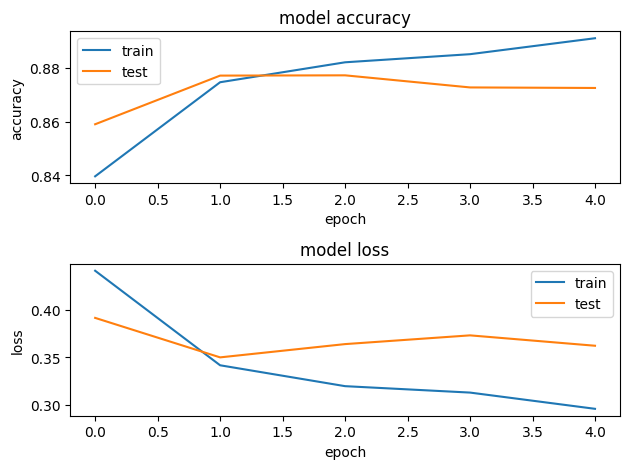

In [ ]:
create_plot(results)

З графіку accuracy бачимо що train та test перетинаються вже після першої епохи, а далі модель на train данних перенавчається а на test зменьшує accuracy до 3ї епохи і виходить на плато.

На графіку loss бачимо як на test данних відбувається падіння вже на першій епосі, потім зріст помилки і на 3ій епосі знову повільне зниження.

---

### Confusion matrix

In [ ]:
classes_x=np.argmax(prediction_values,axis=1)

Text(0.5, 23.52222222222222, 'Predicted')

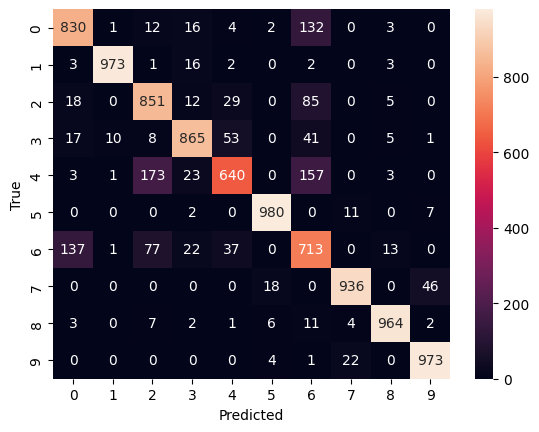

In [ ]:
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, classes_x)
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

На матриці бачимо як 0 та 2 класи коррелюють з 6. 2 також корелює з 4. Інші мають незначну корреляцію.

Візуалізуємо приклад класифікації нашої моделі

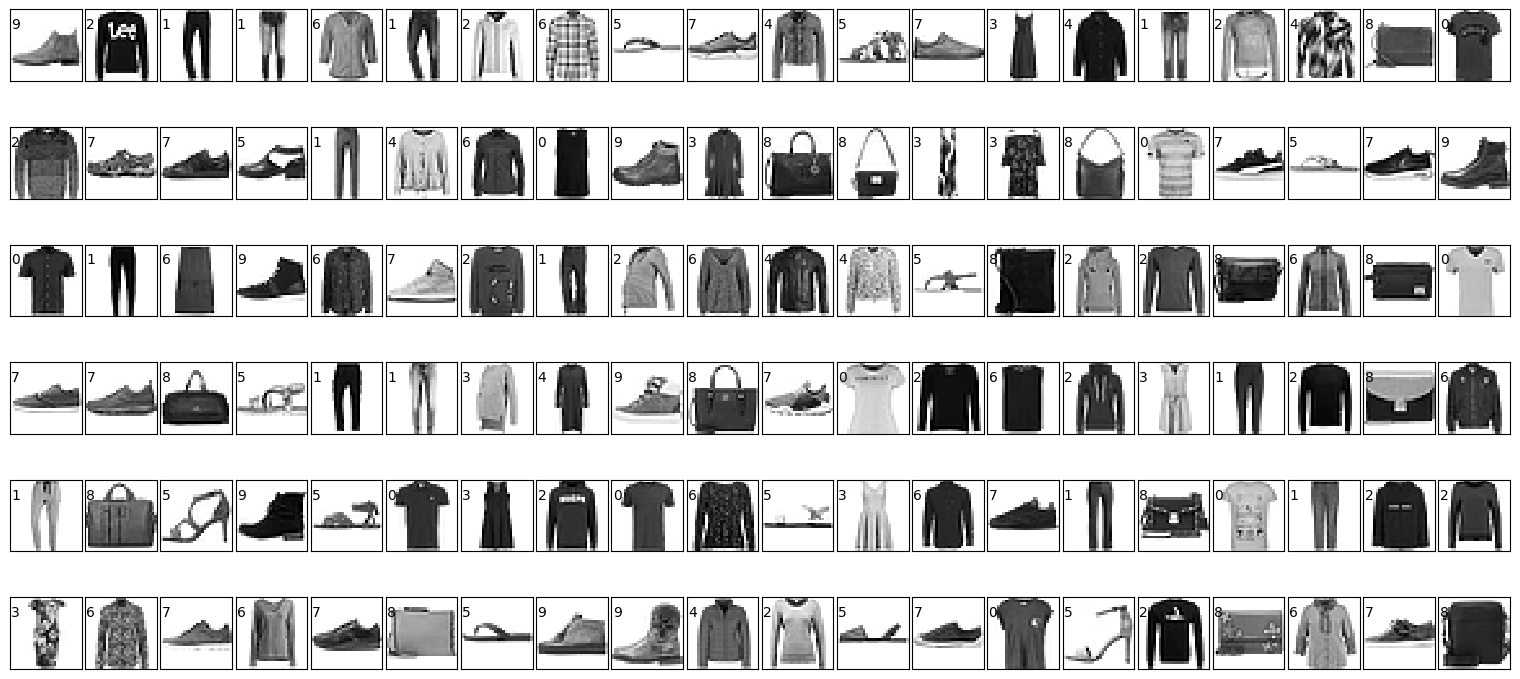

In [ ]:
## set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(classes_x[i]))

### Дякую за увагу =)